# Quantitative Analysis 

This Jupyter notebook provides a comprehensive **exploratory data analysis (EDA)** of the Boston Housing dataset. It walks through data loading, cleaning, indexing, grouping, and summary statistics, with clear examples and commentary. The goal is to help users develop familiarity with `pandas`, `numpy`, `matplotlib`, and `seaborn` for quantitative analysis. Special attention is given to understanding data distribution, variable relationships, and insights related to housing near the Charles River.


## Installing Libraries

In [ ]:
%pip install numpy 
%pip install pandas
%pip install seaborn
%pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data Analysis

Using `set_option` in pandas so that floating-point numbers (decimals) are shown with only **2 digits after the decimal point** when printed. It helps make data tables easier to read.

For more arguments `set_option` can take checkout [Pandas Documentation on set_options](https://pandas.pydata.org/docs/reference/api/pandas.set_option.html)

In [3]:
# Set pandas options for better display of floating point numbers
pd.set_option("display.precision", 2)

Using `read_csv` to load a CSV file named `"Boston.csv"` into a pandas **DataFrame** called `df`. The using `head()` to display the first 5 rows, by default. We could also use `head(10)` if we wanted to display the first 10 rows.

Here is the [data](./Boston.csv) we used but, if you have data you would rather use, feel free to use it. Just make sure to change the path in the data variable.

In [4]:
# Load the Boston housing dataset
df = pd.read_csv("./Boston.csv")
# Display the first few rows of the dataset
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,396.90,4.98,24.0
1,2,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,396.90,9.14,21.6
2,3,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242,17.8,392.83,4.03,34.7
3,4,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,394.63,2.94,33.4
4,5,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,396.90,5.33,36.2


`drop()` removes the column named 'Unnamed: 0' from the DataFrame df in place (without creating a new DataFrame). `axis=1` means you're dropping a column (not a row). `inplace=True` means the change is made directly to df — no need to reassign it.

In [5]:
# Drop the 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

### Printing DataFrames

Displays the **number of rows and columns** in the dataset `df`. `.shape` returns a **tuple**: `(num_rows, num_columns)`.

In [6]:
# Display the number of rows and columns in the dataset
print(df.shape)

(506, 14)


Prints the **column names** of the DataFrame `df`. `.columns` returns an **Index object** containing all column labels. This helps you quickly see what features (columns) are included in the dataset.

In [7]:
# Display the column names of the dataset
print(df.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


`.info` displays a summary of the dataset, including: number of rows and columns, column names, number of non-null (non-missing) values in each column, column data types, and memory usage. This is helpful to see if the data has any missing values. 

In [8]:
# Display the summary information of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


The column `chas` represents Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). If this variable was not already of type `int` and was of type `boolean` we could use `astype()` to change its type from `boolean` to `int`. This would allow for easier numerical analysis. 

Since, `chas` is already of type `int` we will leave the next line commented out. 

In [9]:
#df["chas"] = df["chas"].astype("int64")

`describe()` displays basic statistical summaries for each numeric column in the dataset df.

Output includes:
count – number of non-missing values
mean – average
std – standard deviation
min – minimum value
25%, 50% (median), 75% – quartiles
max – maximum value

Using this can help you understand your data by seeing the ranges, detect outliers or skews, check for data issues, and help guide you in processing the data. 

In [10]:
# Display basic statistics of the dataset
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


### Sorting

`sort_values()` **sorts the dataset by the `tax` column in descending order** (from highest to lowest) and then uses `head()` to display the **top 5 rows** of the result. This helps you **quickly find the most heavily taxed areas** in the dataset and can reveal **extreme values or outliers** in the `tax` column.

If you wanted the **lowest** tax values, you would set `ascending=True`.


In [11]:
# Display the first 5 rows of the dataset,  sorted by a specific column
df.sort_values(by="tax", ascending=False).head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
492,0.11,0.0,27.74,0,0.61,5.98,83.5,2.11,4,711,20.1,396.90,13.35,20.1
491,0.11,0.0,27.74,0,0.61,5.98,98.8,1.87,4,711,20.1,390.11,18.07,13.6
490,0.21,0.0,27.74,0,0.61,5.09,98.0,1.82,4,711,20.1,318.43,29.68,8.1
489,0.18,0.0,27.74,0,0.61,5.41,98.3,1.76,4,711,20.1,344.05,23.97,7.0
488,0.15,0.0,27.74,0,0.61,5.45,92.7,1.82,4,711,20.1,395.09,18.06,15.2


You can also sort by more than one column.

In [12]:
# Display the first 5 rows of the dataset, sorted by 'chas' and 'tax'
df.sort_values(by=["chas", "tax"], ascending=[True, False]).head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
488,0.15,0.0,27.74,0,0.61,5.45,92.7,1.82,4,711,20.1,395.09,18.06,15.2
489,0.18,0.0,27.74,0,0.61,5.41,98.3,1.76,4,711,20.1,344.05,23.97,7.0
490,0.21,0.0,27.74,0,0.61,5.09,98.0,1.82,4,711,20.1,318.43,29.68,8.1
491,0.11,0.0,27.74,0,0.61,5.98,98.8,1.87,4,711,20.1,390.11,18.07,13.6
492,0.11,0.0,27.74,0,0.61,5.98,83.5,2.11,4,711,20.1,396.90,13.35,20.1


### Indexing and Retrieving Data

To get a single column, you can use a `DataFrame['Name']` construction. Using this we can get the proportion of homes near the Charles River.  We can wrap it in `float()` to convert it to a regular python float value. 

Our result tells us that **6.92%** of these homes are along the Charles River. 

In [13]:
# Display the mean of the 'chas' column
float(df["chas"].mean())

0.0691699604743083

Boolean indexing with a single column is simple and powerful. You use the syntax `df[P(df['Name'])]`, where `P` is a condition applied to each value in the `'Name'` column. This returns a new DataFrame that includes **only the rows** where the `'Name'` values meet the condition `P`.

We can use this to get the average numerical values for housed that are along the Charles River.

In [14]:
df[df["chas"] == 1].mean()

crim         1.85
zn           7.71
indus       12.72
chas         1.00
nox          0.59
rm           6.52
age         77.50
dis          3.03
rad          9.31
tax        386.26
ptratio     17.49
black      373.00
lstat       11.24
medv        28.44
dtype: float64

What is the average number of rooms per dwelling of houses that are on the Charles River?

In [15]:
float(df[df["chas"] == 1]["rm"].mean())

6.5196000000000005

DataFrames can be accessed using column labels, row labels (index), or row numbers. The `.loc[]` method is used for indexing by labels, while `.iloc[]` is used for indexing by position (row/column numbers).

In the first example, we're asking for all rows with index values from 0 to 5 **and** all columns from `'crim'` to `'indus'`, **including both endpoints**. In the second example, we're requesting the values from the **first five rows** and the **first three columns**, using standard Python slicing—so the end index is **not included**.

In [16]:
df.loc[0:5, "crim":"indus"]

,crim,zn,indus
0,6.32e-03,18.0,2.31
1,2.73e-02,0.0,7.07
2,2.73e-02,0.0,7.07
3,3.24e-02,0.0,2.18
4,6.91e-02,0.0,2.18
5,2.99e-02,0.0,2.18


In [17]:
df.iloc[0:5, 0:3]

,crim,zn,indus
0,6.32e-03,18.0,2.31
1,2.73e-02,0.0,7.07
2,2.73e-02,0.0,7.07
3,3.24e-02,0.0,2.18
4,6.91e-02,0.0,2.18


To access the first or the last line of the data frame, we can use the df[:1] or df[-1:] construct:

In [18]:
df[:1]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [19]:
df[-1:]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
505,0.05,0.0,11.93,0,0.57,6.03,80.8,2.5,1,273,21.0,396.9,7.88,11.9


### Applying Functions to Cells, Columns and Rows

We can use `apply()` to apply functions to each column. Here we are getting the max value from each column. You can also use `apply()` on each row by setting `axis=1`. 

In [20]:
df.apply(np.max, axis=0)

crim        88.98
zn         100.00
indus       27.74
chas         1.00
nox          0.87
rm           8.78
age        100.00
dis         12.13
rad         24.00
tax        711.00
ptratio     22.00
black      396.90
lstat       37.97
medv        50.00
dtype: float64

### Grouping

This code **Groups the DataFrame by the `'chas'` column** and shows summary statistics for the specified columns (`"crim"`, `"zn"`, `"indus"`).

**Step-by-step explanation**:

1. **`columns_to_show = [...]`**
   Selects the three columns you want to summarize.

2. **`df.groupby(["chas"])`**
   Splits the data into two groups based on the binary `'chas'` column:

   * `0` = not near Charles River
   * `1` = near Charles River

3. **`[columns_to_show]`**
   Limits the output to just the `"crim"`, `"zn"`, and `"indus"` columns.

4. **`.describe(percentiles=[])`**
   Returns descriptive statistics for each group:

   * **count**, **mean**, **std**, **min**, **50% (median)**, **max**
   * No extra percentiles (like 25% and 75%) are included because `percentiles=[]`


**Why it's useful**:

This lets you **compare basic statistics** (e.g., mean crime rate or zoning area) **between homes near and not near the Charles River**.


In [21]:
columns_to_show = ["crim", "zn", "indus"]

df.groupby(["chas"])[columns_to_show].describe(percentiles=[])

crim                                        zn                          \
      count  mean   std       min   50%    max  count   mean    std  min  50%   
chas                                                                            
0     471.0  3.74  8.88  6.32e-03  0.25  88.98  471.0  11.63  23.62  0.0  0.0   
1      35.0  1.85  2.49  1.50e-02  0.45   8.98   35.0   7.71  18.80  0.0  0.0   

             indus                                   
        max  count   mean   std   min    50%    max  
chas                                                 
0     100.0  471.0  11.02  6.91  0.46   8.56  27.74  
1      90.0   35.0  12.72  5.96  1.21  13.89  19.58

We can do the same as above but use `.agg` by passing it a list of funcions. 

In [22]:
columns_to_show = ["crim", "zn", "indus"]

df.groupby(["chas"])[columns_to_show].agg(["mean", "std", "min", "max"])

crim                            zn                     indus        \
      mean   std       min    max   mean    std  min    max   mean   std   
chas                                                                       
0     3.74  8.88  6.32e-03  88.98  11.63  23.62  0.0  100.0  11.02  6.91   
1     1.85  2.49  1.50e-02   8.98   7.71  18.80  0.0   90.0  12.72  5.96   

                   
       min    max  
chas               
0     0.46  27.74  
1     1.21  19.58

### Summary Tables

Suppose we want to see how the observations in our sample are distributed in the context of two variables - `chas` and `rad`. To do so, we can build a contingency table using the `crosstab` method. This can be used to help you see the relationship between two variables. 

In [23]:
pd.crosstab(df["chas"], df["rad"])

rad,1,2,3,4,5,6,7,8,24
chas,,,,,,,,,
0,19,24,36,102,104,26,17,19,124
1,1,0,2,8,11,0,0,5,8


`pivot_table` creates a **pivot table** that shows the **average values** of the `"zn"`, `"indus"`, and `"nox"` columns, **grouped by** the values in the `"chas"` column.

**What it does**:

* **Rows (`index`)**: Unique values in `"chas"` (usually 0 or 1 — whether a home is near the Charles River).
* **Values**: The columns `"zn"` (proportion of residential land zoned for lots over 25,000 sq.ft.), `"indus"` (proportion of non-retail business acres per town), and `"nox"` (nitric oxides concentration (parts per 10 million)).
* **`aggfunc="mean"`**: Calculates the **mean** for each group.

**Why it's useful**:

It helps you **compare average zoning, industrial proportion, and pollution** between homes near the river and those that aren't.


In [24]:
df.pivot_table(
    ["zn", "indus", "nox"],
    ["chas"],
    aggfunc="mean",
)

,indus,nox,zn
chas,,,
0,11.02,0.55,11.63
1,12.72,0.59,7.71


Uses, `sns.displot`, Seaborn to create a distribution plot (histogram) of the `medv` column, which represents median home values in the Boston housing dataset.

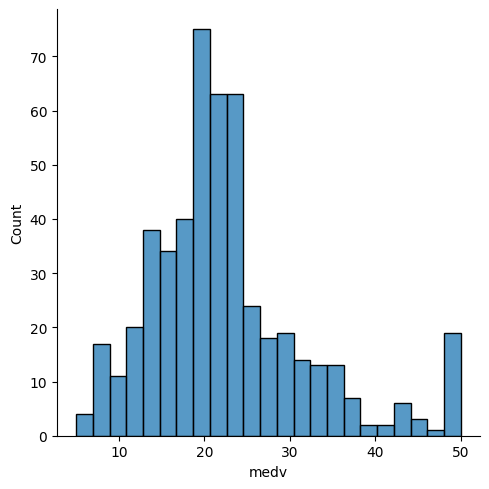

In [25]:
sns.displot(x=df['medv']);

This code block creates a **heatmap of the correlation matrix** for the dataset `df` using Matplotlib and Seaborn:

**What this does**:

* **`df.corr()`** calculates the **Pearson correlation** between all numeric features.
* **`sns.heatmap()`** visualizes this correlation matrix:

  * Cells are **color-coded** by strength of correlation (red = stronger).
  * **`annot=True`** shows the numeric correlation values in each cell.
  * **`fmt='.2f'`** ensures values are shown with 2 decimal places.

**Why it's useful**:

* Helps you **spot strong positive or negative relationships** between variables.
* Useful for **feature selection** or identifying **multicollinearity** in models.

**Multicollinearity** occurs when two or more predictor variables are highly correlated, which can make it difficult to determine their individual effects in a regression model.


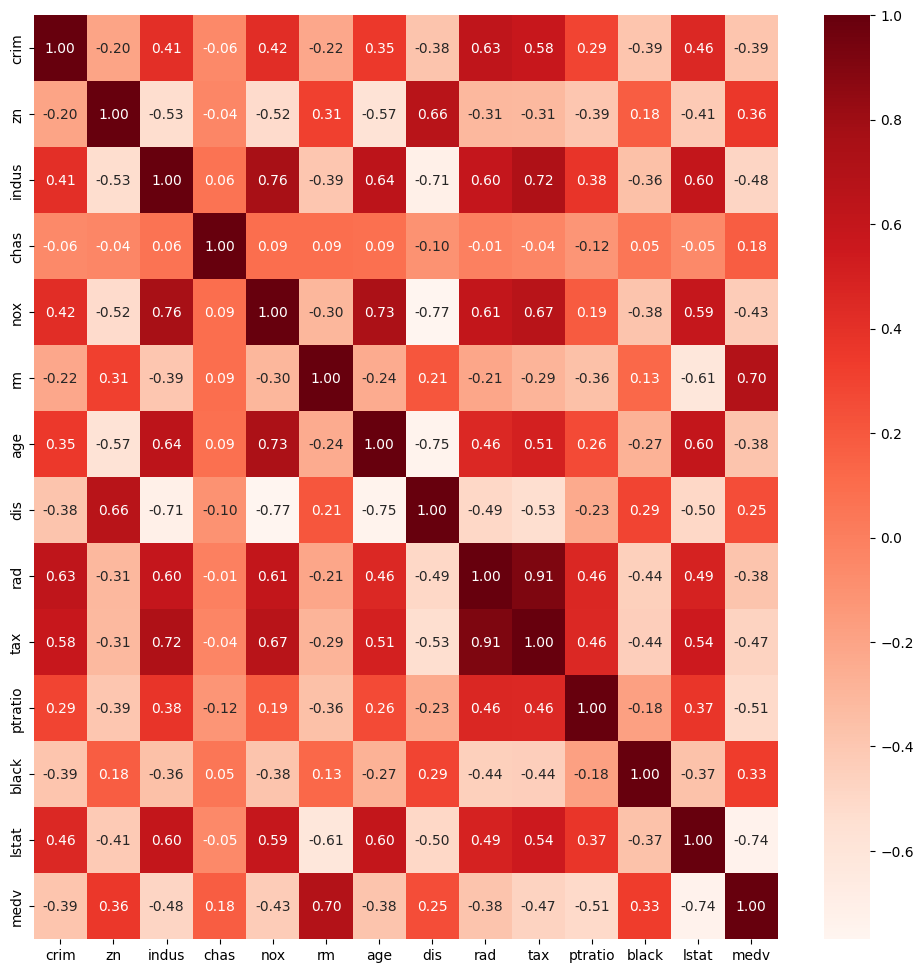

In [26]:
plt.figure(figsize=(12,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f');

## Acknowledgements

Information, code examples, and dataset insights in this notebook were adapted or inspired by the following Kaggle resources:

Kashnitsky, A. – [Topic 1: Exploratory Data Analysis with Pandas](https://www.kaggle.com/code/kashnitsky/topic-1-exploratory-data-analysis-with-pandas#2.-First-attempt-at-predicting-telecom-churn)  
Ziad Hamada Fathy – [Boston House Price Predictions](https://www.kaggle.com/code/ziadhamadafathy/boston-house-price-predictions)  
Willian Leite – [Boston Housing Dataset](https://www.kaggle.com/datasets/willianleite/boston-housing-dataset/code)

Thanks to these contributors for their valuable work.

This notebook was created by Meara Cox, June 2024, as a part of her summer internship. 